In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None) #this makes the head() function not cut off any columns, so I can make sure every one is passed thuroughly

dog = pd.read_csv("dog_data.csv")
asb = pd.read_csv("asbestos.csv")
pub = pd.read_csv("public_areas.csv")
pop = pd.read_csv("us_2020.csv")
zips = pd.read_csv("zips.csv")


# Cleaning rows

In [3]:
zips.head()

# print(zips.columns)
zipcols = ['zip_type', 'state', 'state_fips',
       'county_fips', 'county_name', 's3dzip', 'lat', 'lon', 'empty_col',
       'tot_res_cnt', 'mfdu', 'sfdu', 'box_cnt', 'biz_cnt', 'relver', 'color',
       'globalid', 'shape_st_area', 'shape_st_length', 'objectid']
for col in zipcols:
    zips.drop(col , inplace=True, axis=1)
zips.head() # we now have a neighborhood name for each zip code in the city


,zip,name
0,15007,BAKERSTOWN
1,15014,BRACKENRIDGE
2,15015,BRADFORD WOODS
3,15018,BUENA VISTA
4,15034,DRAVOSBURG


In [4]:
dog.head()

#print(dog.columns)

dogcols = ['Breed', 'Color', 'DogName', 'ExpYear', 'ValidDate']
for col in dogcols:
    dog.drop(col , inplace=True, axis=1)
dog.head() # dogs now have a 'count' for each zip code

,LicenseType,OwnerZip
0,Dog Lifetime Spayed Female,15137
1,Dog Lifetime Neutered Male,15129
2,Dog Lifetime Spayed Female,15129
3,Dog Lifetime Spayed Female,15140
4,Dog Lifetime Spayed Female,15238


In [5]:
#print(asb.columns)
asbcols = ['permit_number', 's_name', 's_address', 'city', 'p_fee',
       'pa_license_no', 'contractor_name', 'permit_specifications',
       'square_feet', 'is_the_building_occupied', 'i_date', 'e_date',
       'achd_inspector', 'latitude', 'longitude', 'permit_o_e_date']
for col in asbcols:
    asb.drop(col , inplace=True, axis=1)
asb.head() # keeping only the relevant columns

,z_code,job_complete,is_permit_date_extended,project_type,status
0,15219,t,f,DEM,COMPLETE
1,15208,f,f,PAA,EXPIRED
2,15132,f,f,DEM,COMPLETE
3,15132,f,f,DEM,COMPLETE
4,15132,t,f,DEM,COMPLETE


In [6]:
#print(pub.columns)
pub.head()
pubcols = ['x', 'y', 'fid', 'perimeter', 'publicbl_i', 'facility', 'facility_c',
       'address', 'city', 'class']
for col in pubcols:
    pub.drop(col , inplace=True, axis=1)
pub.head() # keeping only the relevant columns

,zipcode,municode
0,15205,100.0
1,15219,100.0
2,15206,100.0
3,15210,100.0
4,15116,944.0


In [7]:
print(pop.columns)
pop.head()

popcols = ['latitude',
       'longitude']
for col in popcols:
    pop.drop(col , inplace=True, axis=1)
pop.head() # keeping only the relevant columns


Index(['zip', 'population', 'population_density', 'city', 'state', 'latitude',
       'longitude'],
      dtype='object')


,zip,population,population_density,city,state
0,10162,1726,151834.77,New York,New York
1,10028,44987,126067.69,New York,New York
2,10128,59856,122356.52,New York,New York
3,8625,1834,115477.17,Trenton,New Jersey
4,10031,60221,101100.03,New York,New York


# Dropping Null

In [8]:
tables = [zips, dog, asb, pop, pub]
tablename = ['zips', 'dog', 'asb', 'pop', 'pub']
count = 0
for table in tables:
    print(tablename[count])
    print(table.isnull().sum())
    count += 1
count = 0
for table in tables:
    print(tablename[count])
    print(table.size)
    count += 1

zips
zip     0
name    0
dtype: int64
dog
LicenseType    0
OwnerZip       0
dtype: int64
asb
z_code                      15
job_complete               286
is_permit_date_extended    312
project_type                 0
status                       0
dtype: int64
pop
zip                   0
population            0
population_density    0
city                  0
state                 0
dtype: int64
pub
zipcode      0
municode    53
dtype: int64
zips
250
dog
82836
asb
36555
pop
158500
pub
506


In [9]:
asb = asb.dropna()
pub = pub.dropna()

# Find totals

In [10]:
dog = dog.rename(columns = {"OwnerZip":"zip"})
dogs = dog.value_counts("zip").to_frame()
dogs.reset_index(inplace=True)
dogs = dogs.rename(columns = {0:"num_dogs"})
dogs = dogs.merge(pop)
dogs.head(20)

,zip,num_dogs,population,population_density,city,state
0,15237,2418,42597,1714.83,Pittsburgh,Pennsylvania
1,15236,1701,30630,3072.10,Pittsburgh,Pennsylvania
2,15108,1441,37804,943.40,Coraopolis,Pennsylvania
3,15102,1397,30825,2956.30,Bethel Park,Pennsylvania
4,15044,1388,23196,559.16,Gibsonia,Pennsylvania
5,15235,1378,39126,2576.18,Pittsburgh,Pennsylvania
6,15239,1326,21108,1229.97,Pittsburgh,Pennsylvania
7,15122,1298,21861,1565.84,West Mifflin,Pennsylvania
8,15101,1282,24323,1227.85,Allison Park,Pennsylvania
9,15227,1254,29621,4843.37,Pittsburgh,Pennsylvania


In [11]:
asb = asb.rename(columns = {"z_code":"zip"})
#asb = asb.merge(pop)
asb.dtypes
asb['zip'] = asb['zip'].astype('int64')
asb = asb.value_counts("zip").to_frame()
asb.reset_index(inplace=True)
asb = asb.rename(columns = {0:"asbestos"})
asb = asb.merge(pop)
asb.head(15)

,zip,asbestos,population,population_density,city,state
0,15213,601,28320,12135.47,Pittsburgh,Pennsylvania
1,15132,569,26131,4629.54,Mckeesport,Pennsylvania
2,15219,563,19204,8488.98,Pittsburgh,Pennsylvania
3,15212,403,31850,4985.21,Pittsburgh,Pennsylvania
4,15222,291,1999,2255.97,Pittsburgh,Pennsylvania
5,15206,219,32482,6735.79,Pittsburgh,Pennsylvania
6,15025,213,17341,991.51,Clairton,Pennsylvania
7,15221,189,36387,5660.09,Pittsburgh,Pennsylvania
8,15122,154,21861,1565.84,West Mifflin,Pennsylvania
9,15208,135,13352,7244.66,Pittsburgh,Pennsylvania


In [12]:
pub = pub.rename(columns = {"zipcode":"zip"})
pub = pub.value_counts("zip").to_frame()
pub.reset_index(inplace=True)
pub = pub.rename(columns = {0:"public_builds"})
pub = pub.merge(pop)
pub.head(15)

,zip,public_builds,population,population_density,city,state
0,15217,11,26425,7129.47,Pittsburgh,Pennsylvania
1,15143,9,16518,463.99,Sewickley,Pennsylvania
2,15222,8,1999,2255.97,Pittsburgh,Pennsylvania
3,15221,8,36387,5660.09,Pittsburgh,Pennsylvania
4,15206,8,32482,6735.79,Pittsburgh,Pennsylvania
5,15205,7,22586,2350.14,Pittsburgh,Pennsylvania
6,15212,7,31850,4985.21,Pittsburgh,Pennsylvania
7,15219,6,19204,8488.98,Pittsburgh,Pennsylvania
8,15202,5,21022,4460.81,Pittsburgh,Pennsylvania
9,15120,4,20437,4505.69,Homestead,Pennsylvania


In [13]:
df = dogs
df = df.merge(asb)
df = df.merge(pub)
df.head(60)
print(df.columns)

Index(['zip', 'num_dogs', 'population', 'population_density', 'city', 'state',
       'asbestos', 'public_builds'],
      dtype='object')


In [14]:
df.drop('state', inplace=True, axis=1)
df.drop('population_density', inplace=True, axis=1)
df.head()

,zip,num_dogs,population,city,asbestos,public_builds
0,15237,2418,42597,Pittsburgh,128,3
1,15236,1701,30630,Pittsburgh,98,2
2,15108,1441,37804,Coraopolis,110,3
3,15102,1397,30825,Bethel Park,50,1
4,15044,1388,23196,Gibsonia,23,1


In [15]:
df['dogs_per'] = df['num_dogs'].div(df['population'])
df['dogs_per'] = df['dogs_per'].mul(1000)

In [16]:
df['asb_per'] = df['asbestos'].div(df['population'])
df['asb_per'] = df['asb_per'].mul(1000)

In [17]:
df['build_per'] = df['public_builds'].div(df['population'])
df['build_per'] = df['build_per'].mul(1000)

In [18]:
df['final_rank'] = df['build_per'].add(df['asb_per'])
df['final_rank'] = df['final_rank'].add(df['dogs_per'])
df = df.sort_values(by = ['final_rank'], ascending=False)
df.head()

,zip,num_dogs,population,city,asbestos,public_builds,dogs_per,asb_per,build_per,final_rank
81,15222,3,1999,Pittsburgh,291,8,1.500750,145.572786,4.002001,151.075538
69,15086,24,284,Warrendale,4,1,84.507042,14.084507,3.521127,102.112676
51,15034,124,2015,Dravosburg,61,1,61.538462,30.272953,0.496278,92.307692
13,15037,954,11676,Elizabeth,20,3,81.706064,1.712915,0.256937,83.675916
26,15133,537,6816,Mckeesport,15,2,78.785211,2.200704,0.293427,81.279343


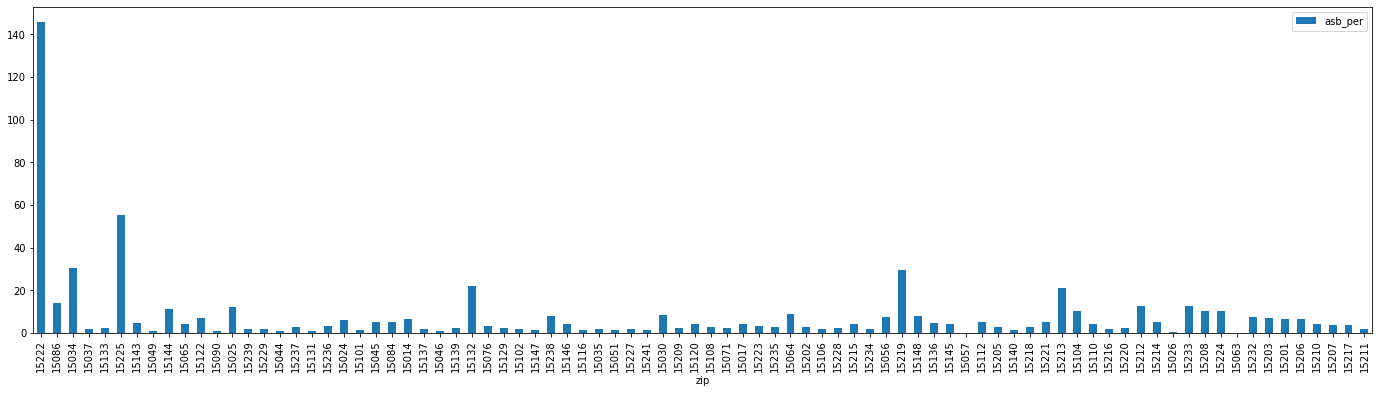

In [30]:
asbplt = df.plot.bar(x='zip', y='asb_per', rot=90, figsize=(24, 6))

The above plot shows the extreme advantage asbestos gives 15222 as the value is over double the next highest, and the below plots show the distributions of the other variables.

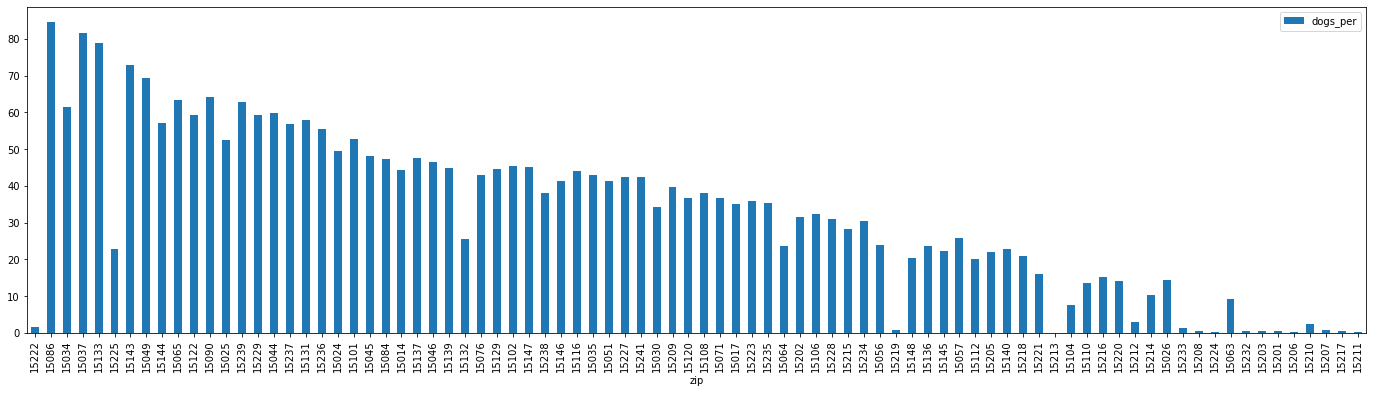

In [32]:
dogplt = df.plot.bar(x='zip', y='dogs_per', rot=90, figsize=(24, 6))

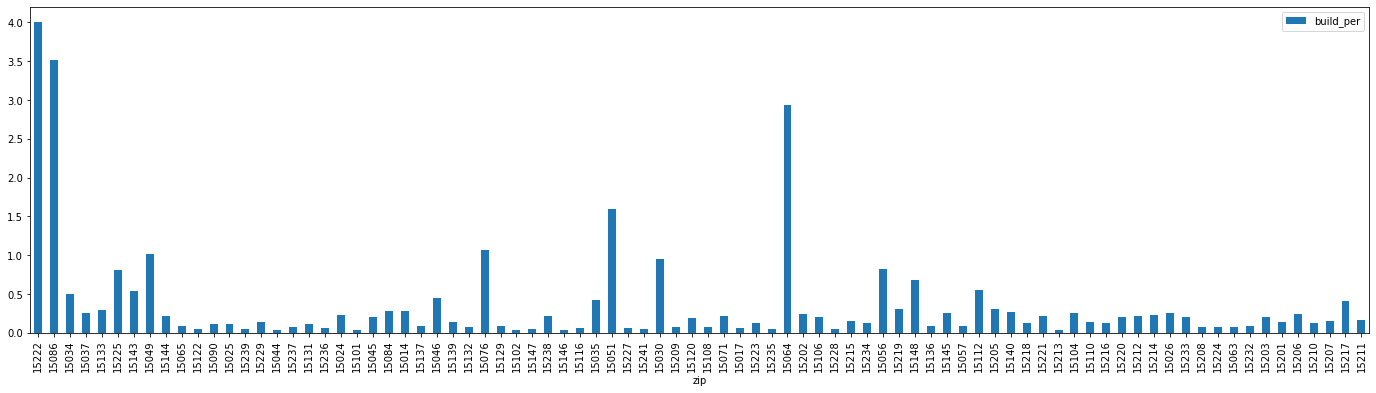

In [34]:
pubplt = df.plot.bar(x='zip', y='build_per', rot=90, figsize=(24, 6))

From this final ranking, zipcode 15222 a.k.a Pittsburgh's Strip District is the best place to share a neighborhood with other people.